<a href="https://colab.research.google.com/github/Infinitewumbo/101205106_COMP3123-exec05/blob/main/Lab6_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import train test split
# We split up the entire original dataset into training(bigger subset) and testing sets
from sklearn.model_selection import train_test_split
# import the linear regression model
from sklearn import metrics
from sklearn.linear_model import LinearRegression # capital letters, class

# Note, seaborn is not available in Jupyter Lite, use Collab or a local environment
import seaborn as sns # we use this library to load the dataset

# Boston housing dataset - Exploratory Data Analysis (EDA)

- Kaggle [competition page](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
- See the `data_description.txt` file in this folder

# Part I : Loading the data and initial exploration

## Step 1-I: Import the data (schema, types, etc.)

Since this is a Kaggle competition, there is a separate dataset for which only Kaggle knows the targets.

Otherwise people would submit the known targets and get a perfect score. `df_test` loaded from `test.csv` is the part of the data for which we don't know the targets (SalePrice).


In [ ]:
df_train = pd.read_csv('train.csv', keep_default_na=False)
# prevents NA to be read as NaN (missing value)
# for categorical data NA is a valid value
# so NA is read as NA nor as NaN
df_test = pd.read_csv('test.csv', keep_default_na=False)

The following categorical (textual) columns contain string values `"NA"`, which might be erroneously considered as missing value by pandas:

- `Alley` : NA = No alley access

- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2` : NA = No Basement

- `FireplaceQu` : NA = No Fireplace

- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond` : NA = No Garage

- `PoolQC` : NA = No Pool

- `Fence` : NA = No Fence

- `MiscFeature` : NA = None

## Step 2-I: Getting familiar with the data

#### What are the types of the `df_train` and `df_test`?

In [ ]:
print(type(df_train))
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### What is the size of the train and test data?

In [ ]:
# Was this a 80-20 or 90-10 split of our original dataset? No - this is a 50-50 split
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


#### Why the `test` data has one column less than the `train` data?

Answer: The test data has no target variable - the `SalePrice` column.

#### Print the top 5 rows of the DataFrame using the `head()` function

In [ ]:
print(df_test.head())
print(df_train.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave    NA      Reg   
1  1462          20       RL         81.0    14267   Pave    NA      IR1   
2  1463          60       RL         74.0    13830   Pave    NA      IR1   
3  1464          60       RL         78.0     9978   Pave    NA      IR1   
4  1465         120       RL         43.0     5005   Pave    NA      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0     NA  MnPrv          NA   
1         Lvl    AllPub  ...           0        0     NA     NA        Gar2   
2         Lvl    AllPub  ...           0        0     NA  MnPrv          NA   
3         Lvl    AllPub  ...           0        0     NA     NA          NA   
4         HLS    AllPub  ...         144        0     NA     NA          NA   

  MiscVal MoSold  SaleType  SaleCondition  Age  
0       0      6   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:

# There are lots of columns, Pandas omits most of them in an attempt to fit the text on the screen.
# We can use this trick to force it print all of the in a manageable format. `T` transposes the data frame.
print(df_train.head().T.to_string(max_rows=100))

                     0        1        2        3        4
Id                   1        2        3        4        5
MSSubClass          60       20       60       70       60
MSZoning            RL       RL       RL       RL       RL
LotFrontage       65.0     80.0     68.0     60.0     84.0
LotArea           8450     9600    11250     9550    14260
Street            Pave     Pave     Pave     Pave     Pave
Alley               NA       NA       NA       NA       NA
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1F

Note: As you can see for example for Alley column, the `NA` values are not considered as missing values (`NaN`).

#### Print the full list of all columns in the dataset (use `DataFrame.columns` attribute)

See `data_description.txt` for more information on the columns

In [ ]:
# We will choose the column names that are most important for out feature engineering
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Find the data types of the columns (use `DataFrame.dtypes` attribute) - use .to_string() to show all columns in the output

In [ ]:
# To see the datatypes of the individual column values - use dtypes of the type() function
print(df_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Age                int64
Length: 80, dtype: object


Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

#### Looking at the data types of columns and compare them with descriptions in `data_description.txt`

#### Columns `LotFrontage` and `MasVnrArea` need to be converted to numeric type (obscure import problem)

In [ ]:
## Convert two columns to 'numeric' type as mentioned above
df_train['LotFrontage'] = pd.to_numeric(df_train['LotFrontage'], errors='coerce')
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')

#### When changing features, it's important to remember that any transformations that you've applied to the training data
#### must be applied to the test data as well (before fitting the model).

In [ ]:
## Convert two columns of test dataframe to 'numeric' type as mentioned above
df_test['LotFrontage'] = pd.to_numeric(df_test['LotFrontage'], errors='coerce')
df_test['MasVnrArea'] = pd.to_numeric(df_test['MasVnrArea'], errors='coerce')

#### Print the 3 different data types in the dataset - Use `set()` function

In [ ]:
# We want an undordered, but uniques set of datatypes in the column values of the dataset
print(set(df_train.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}


{dtype('int64'), dtype('float64'), dtype('O')}

## Step 3-I: Handling missing values

#### View the missing values in all features

In [ ]:
# Transpose has already been applied to this dataframe, so the columns are listed looking like rows
df_train.isnull().sum().sort_values(ascending=False)
# LotFrontage and MasVnrArea are the only columns with some null values

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
SaleType,0
SaleCondition,0
SalePrice,0


#### Check the missing values in the test data

In [ ]:
# In this column, we have values between 20-320 approximately with some NaN values
print(df_train["LotFrontage"].sort_values(ascending=False))

1298    313.0
934     313.0
1127    182.0
231     174.0
197     174.0
        ...  
434      21.0
1378     21.0
225      21.0
227      21.0
232      21.0
Name: LotFrontage, Length: 1460, dtype: float64


LotFrontage      259
MasVnrArea         8
MSSubClass         0
Id                 0
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

#### You can use `df.dropna(subset=['LotFrontage', 'MasVnrArea'])` to drop all the rows with missing values.


#### Or you can fill the missing values in `LotFrontage` and `MasVnrArea` with the mean value of the column in the entire dataset.

#### Note: Don't forget to apply the same transformation to the test data.

In [ ]:
# We will receive a better result in the end from our ML algorithm if we replace those values
# with the average values in that REAL dataset rather than dropping entire rows

print(df_train["LotFrontage"].mean()) # Average is about 70
print(df_train["MasVnrArea"].mean())  # Average is about 103

## Replacing missing values in the above mentioned two columns by their means
replacement = {'LotFrontage': df_train['LotFrontage'].mean(), 'MasVnrArea': df_train['MasVnrArea'].mean()}
df_train.fillna(replacement, inplace=True)
df_test.fillna(replacement, inplace=True)

df_train[df_train["LotFrontage"] > 70]

70.04995836802664
103.68526170798899


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
1,2,20,RL,80.000000,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,WD,Normal,181500,31
4,5,60,RL,84.000000,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,250000,8
5,6,50,RL,85.000000,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,WD,Normal,143000,16
6,7,20,RL,75.000000,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,WD,Normal,307000,3
7,8,60,RL,70.049958,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,WD,Normal,200000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.000000,10000,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,240000,12
1451,1452,20,RL,78.000000,9262,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,New,Partial,287090,1
1453,1454,20,RL,90.000000,17217,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,7,WD,Abnorml,84500,0
1456,1457,20,RL,85.000000,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,WD,Normal,210000,32


**Note: we are filling in the mean of df, not df_test, we need to apply identical transformations to both dataframes**

## Step 4-I: Feature Engineering

#### Step 4a ) Adding a new feature `Age = YrSold - YearBuilt` to the dataset.

In [ ]:
## Create new column for the age of the house
# This calculation allows us to capture the information from both columns YrSold and YearBuilt in ONE column
df_train['Age'] = df_train['YrSold'] - df_train['YearBuilt']
## Drop the two columns from which we created new one
df_train.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
## View the dataframe again
df_train.head()

KeyError: 'YrSold'

#### Perform the same transformation on the test data.

In [ ]:
df_test["Age"] = df_test["YrSold"] - df_test["YearBuilt"]
df_test.drop(["YrSold" , "YearBuilt"], axis=1, inplace=True)
df_test.head()

KeyError: 'YrSold'

#### Step 4b) `SalePrice` Distribution and Transformation


#### If you want to see the summary statistics of `SalePrice`, what command would you use? (`Series.describe()`)

In [ ]:
# Series is the 1D version of a Data Frame, which means we have selected either 1 column or 1 row
df_train["SalePrice"].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


#### Plot histogram of the target variable `SalePrice`

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


<Axes: ylabel='Frequency'>

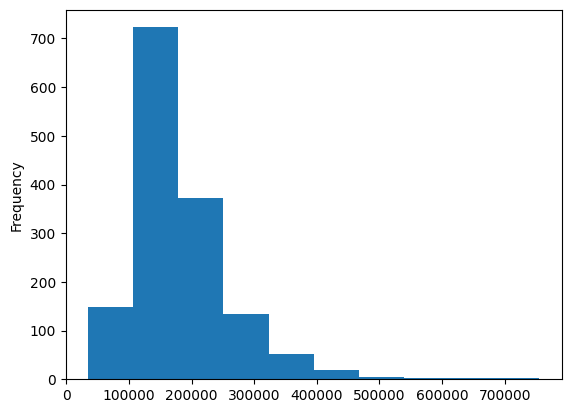

In [ ]:
# Number on the left: row index
# Number on the right: price
print(df_train["SalePrice"])
df_train["SalePrice"].plot(kind="hist")

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

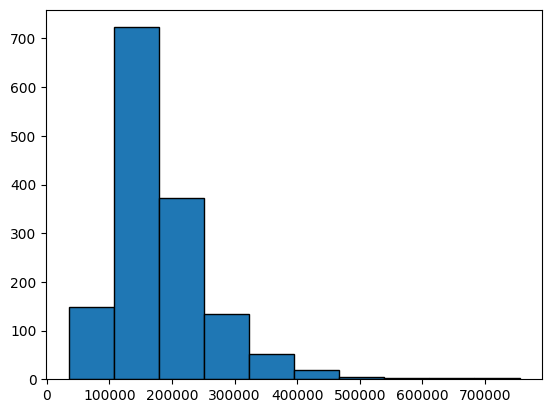

When a majority of the data points are concentrated on the left side or right side of the histogram, we say that the data is `skewed`.

When performing regression, sometimes it makes sense to `log-transform` the target variable when it is `skewed`. **One reason for this is to improve the linearity of the data.**

We use `np.log()` function to `log-transform` the target variable.

In [ ]:
df_train['LogPrice'] = np.log(df_train["SalePrice"])

#### Plot a histogram of the `LogPrice`

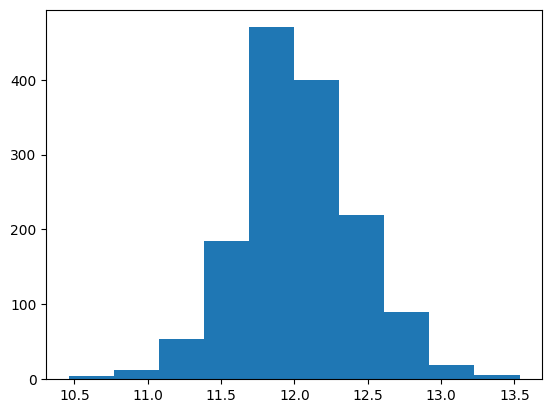

<Axes: ylabel='Frequency'>

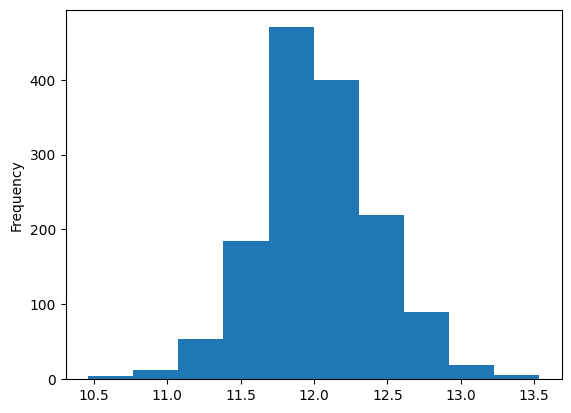

In [ ]:
# We can print out the histogram of the LogPrice compared to the row index using matplotlib or pandas .plot() functions
plt.hist(df_train["LogPrice"])
plt.show()

df_train["LogPrice"].plot(kind="hist")

> # Our goal is to select a subset of features that are most relevant to predicting `LogPrice`.

# Part II : Feature Selection

## Step 1-II: Numerical Columns


#### Select all the numerical columns (`'int64'`, `'float64'`) in the dataset and then create a dataframe with the numerical columns only (`df_num`)

##### Approach 1: Look at `DataFrame.dtypes` as a `Dictionary` and loop over it with `(k, v) = Dictionary.items()` and select the columns (`k`) with dtype = `'int64'` or `'float64'`

In [ ]:
# only numeric columns
numeric_cols = [k for k, f in df_train.dtypes.items() if f in ['int64', 'float64']]
print(numeric_cols)
df_num = df_train[numeric_cols]
df_num

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Age', 'LogPrice']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,61,0,0,0,0,0,2,208500,5,12.247694
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,0,5,181500,31,12.109011
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,42,0,0,0,0,0,9,223500,7,12.317167
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,35,272,0,0,0,0,2,140000,91,11.849398
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,84,0,0,0,0,0,12,250000,8,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,40,0,0,0,0,0,8,175000,8,12.072541
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,0,2,210000,32,12.254863
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,60,0,0,0,0,2500,5,266500,69,12.493130
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,0,112,0,0,0,0,4,142125,60,11.864462


##### Approach 2: Use `DataFrame.select_dtypes()` method and pass `inlcude=['int64', 'float64']` as argument

In [ ]:
df_num= df_train.select_dtypes(include=['int64', 'float64'])
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,61,0,0,0,0,0,2,208500,5,12.247694
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,0,5,181500,31,12.109011
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,42,0,0,0,0,0,9,223500,7,12.317167
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,35,272,0,0,0,0,2,140000,91,11.849398
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,84,0,0,0,0,0,12,250000,8,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,40,0,0,0,0,0,8,175000,8,12.072541
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,0,2,210000,32,12.254863
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,60,0,0,0,0,2500,5,266500,69,12.493130
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,0,112,0,0,0,0,4,142125,60,11.864462


##  Step 2-II: Correlation (or relationship) between the columns (`DataFrame.corr()`)

In [ ]:
corr = df_num.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,LogPrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.021998,-0.050199,-0.005024,-0.005968,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917,0.012724,-0.017942
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.040581,0.022895,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.028746,-0.073959
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.082746,0.179283,0.215828,0.043340,...,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.334901,-0.117117,0.336156
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.013788,0.103960,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832,0.257320
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.550684,0.410238,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629,0.817184
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,0.073741,-0.127788,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325,-0.036868
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,1.000000,0.179186,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360,0.565608
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.179186,1.000000,0.263582,-0.072302,...,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,0.475241,-0.314613,0.429531
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.128451,0.263582,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.248483,0.372023
BsmtFinSF2,-0.005968,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.067759,-0.072302,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.050422,0.004832


#### Print the correlations between the features and the target.

In [ ]:
corr["SalePrice"]

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.334901
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearRemodAdd,0.507101
MasVnrArea,0.475241
BsmtFinSF1,0.386420
BsmtFinSF2,-0.011378


#### Print the five features that are most positively correlated with SalePrice and the five that are most negatively correlated.

#### use `.sort_values(ascending=False)` method to sort the values in descending order and select the first 5 and last 5 values with indexing

In [ ]:
# Position correlations (both values increase together)
print(corr["SalePrice"].sort_values(ascending=False)[:5])
# Negative correlations (as one value increases, the other decreases)
print(corr["SalePrice"].sort_values(ascending=False)[-5:])

SalePrice      1.000000
LogPrice       0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Age             -0.523350
Name: SalePrice, dtype: float64


SalePrice      1.000000
LogPrice       0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Age             -0.523350
Name: SalePrice, dtype: float64


> #### - The moset positively correlated features with SalePrice are: `[OverallQual, GrLivArea]`
> #### - The most negatively correlated features with SalePrice are: `[Age, KitchenAbvGr]`

## Step 3-II: Plot the `SalePrice` against the selected numericalfeatures.

#### The most positively correlated feature is `OverallQual`.

In [ ]:
df_num['OverallQual']

,OverallQual
0,7
1,6
2,7
3,7
4,8
...,...
1455,6
1456,6
1457,7
1458,5


#### Find the unique values of `OverallQual`.

In [ ]:
# using the set function
print(set(df_num['OverallQual']))

print(df_num['OverallQual'].unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
[ 7  6  8  5  9  4 10  3  1  2]


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

#### Scatter plot `SalePrice` vs `OverallQual`

<Axes: xlabel='[OverallQual]', ylabel='[SalePrice]'>

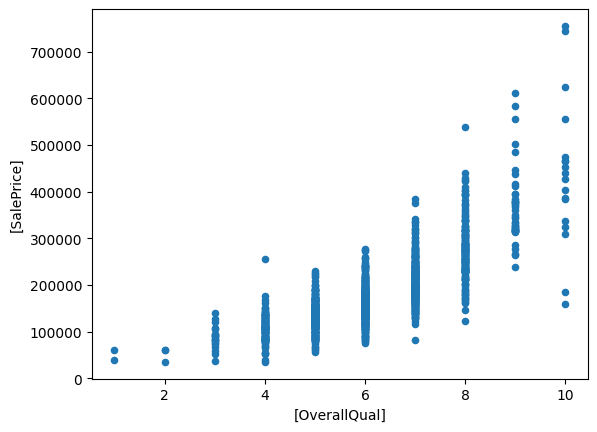

In [ ]:
df_num.plot.scatter(x=["OverallQual"], y=["SalePrice"])

Text(0, 0.5, 'SalePrice')

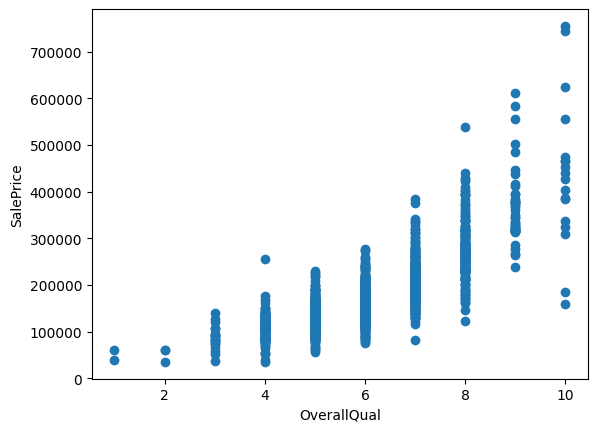

#### In each unique value of `OverallQual`, find the mean of `SalePrice` and plot it as a bar and scatter plot

Text(0, 0.5, 'SalePrice')

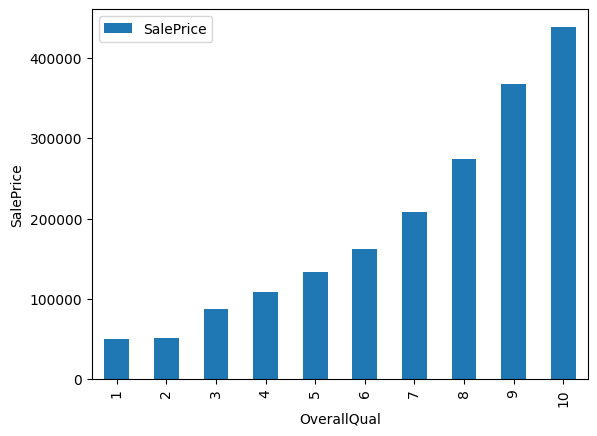

In [ ]:
# print(df_num.groupby("OverallQual").head())
# Group all of the rows that have the same value for OverallQual into the same row
df_grouped_overal = df_num.groupby('OverallQual')[["SalePrice"]].mean()
df_grouped_overal.plot(kind='bar')
#label
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

#### How do you interpret the graph?

Your text here ...

In [ ]:
As overall quality increase, the SalePrice also increases

#### The second most positively correlated feature is `GrLivArea`.

#### Plot the scatter plot of `GrLivArea` and `LogPrice`.

<Axes: xlabel='GrLivArea', ylabel='LogPrice'>

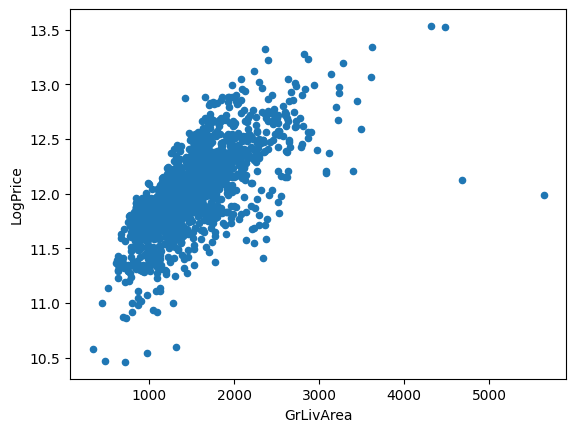

In [ ]:
df_num.plot.scatter(x="GrLivArea", y="LogPrice")

Text(0, 0.5, 'LogPrice')

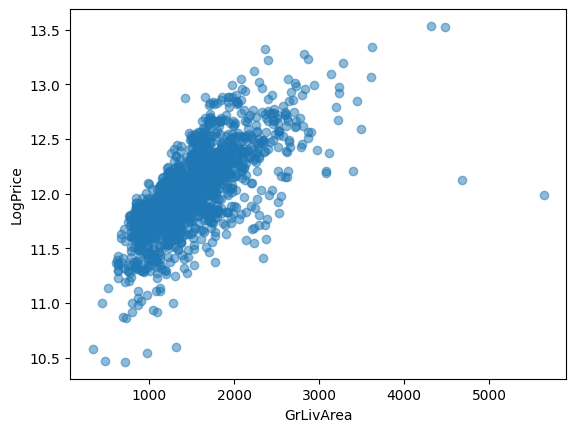

#### `Age` has a negative correlation with `SalePrice`.

#### Make scatter plots of `SalePrice` and `LogPrice` as a function `Age` (two separate plots).

<Axes: xlabel='Age', ylabel='SalePrice'>

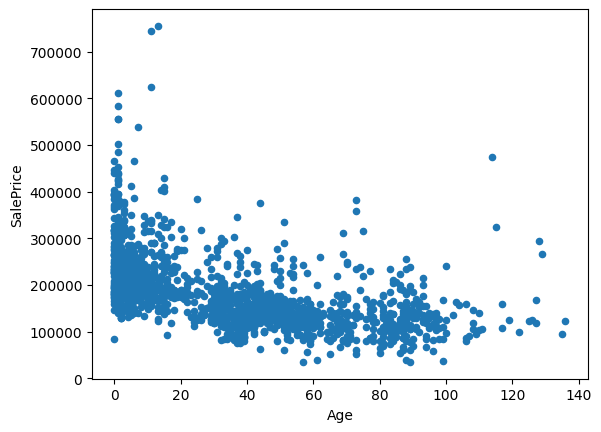

In [ ]:
df_num.plot.scatter(x="Age", y="SalePrice")

<Axes: xlabel='Age', ylabel='LogPrice'>

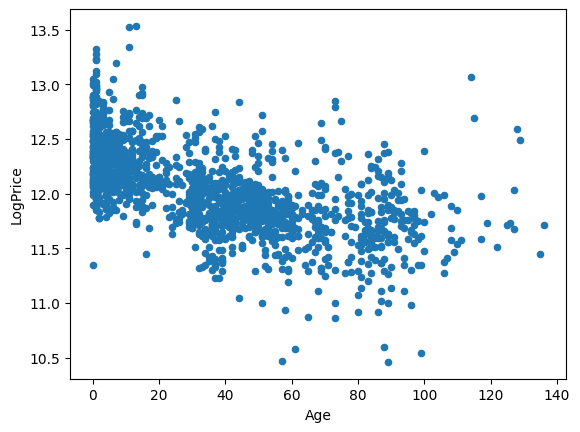

In [ ]:
df_num.plot.scatter(x="Age", y="LogPrice")

Text(0, 0.5, 'LogPrice')

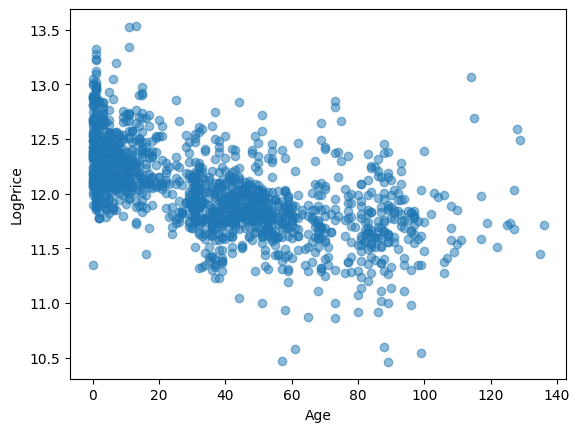

#### `KitchenAbvGr` has a negative correlation with `SalePrice`.

- Find the unique values of `KitchenAbvGr` and their counts. (`.value_counts()`)
- Plot the scatter plot of `KitchenAbvGr` and avrage of `SalePrice`. (use `groupby` and `mean`)

                  SalePrice
KitchenAbvGr               
0             127500.000000
1             183388.790230
2             131096.153846
3             109500.000000


<Axes: xlabel='KitchenAbvGr', ylabel='SalePrice'>

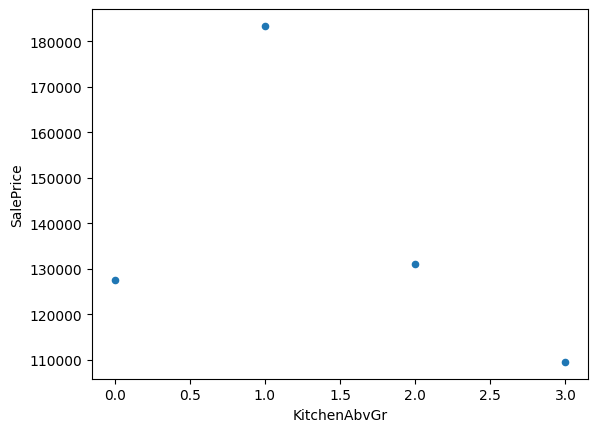

In [ ]:
df_num["KitchenAbvGr"].value_counts()

df_grouped = df_num.groupby("KitchenAbvGr")[["SalePrice"]].mean()
print(df_grouped)

df_grouped = df_grouped.reset_index()

df_grouped.plot.scatter(x="KitchenAbvGr", y="SalePrice")

In [ ]:
df_num['KitchenAbvGr'].value_counts()

,count
KitchenAbvGr,
1,1392
2,65
3,2
0,1


Text(0, 0.5, 'SalePrice')

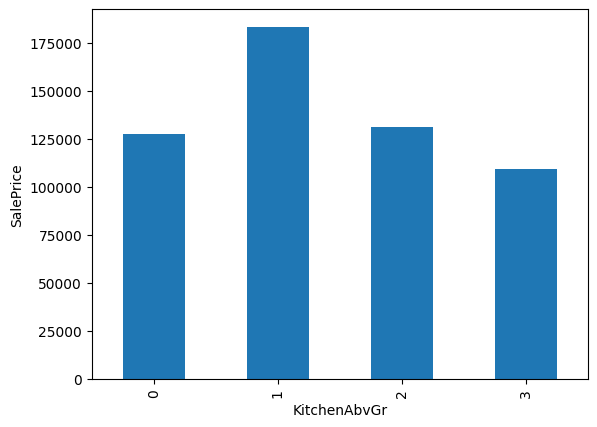

#### How do you interpret the graph?

There is a bell-curve distribution/normal distribution - so that people do not care too mych  about having more than 1 kitchen above grade

## Step 4-II: Non-numerical Columns

### Let's look at the kitchen quality - `KitchenQual`
According to the the description KitchenQual has the following codes:
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor

Convert the quality codes to numbers, 0 for Poor, 1 for Fair etc.

In [ ]:
df_train.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df_test.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'NA'], dtype=object)

In [ ]:
# These number are arbitrary - random - but now every row with Exceptional kitchen (Ex) will instead have a value of 5
# Therefore the machine learning alogrithm will be able to find a pattern on all the rows with value 5
# unfortunately, the machine learning algorithm will ALWAYS consider 5 as BETTER THAN 1
qual_to_num = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}

In [ ]:
# Finally, we create a new column that contains the numerical versions of the categorical cloumn
df_train["KitchenQualNum_mapped"] = df_train["KitchenQual"].map(qual_to_num)

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,LogPrice,KitchenQualNum_mapped
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,2,WD,Normal,208500,5,12.247694,4
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,5,WD,Normal,181500,31,12.109011,3
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,9,WD,Normal,223500,7,12.317167,4
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,2,WD,Abnorml,140000,91,11.849398,4
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,0,12,WD,Normal,250000,8,12.429216,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,8,WD,Normal,175000,8,12.072541,3
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,MnPrv,NA,0,2,WD,Normal,210000,32,12.254863,3
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,WD,Normal,266500,69,12.493130,4
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,0,4,WD,Normal,142125,60,11.864462,4


#### Perform the same operation on the test dataset

In [ ]:
df_test["KitchenQualNum_mapped"] = df_test["KitchenQual"].map(qual_to_num)

In [ ]:
df_test['KitchenQualNum_mapped'].value_counts()

,count
KitchenQualNum_mapped,
3,757
4,565
5,105
2,31
0,1


#### Plot the histogram of `KitchenQualNum_mapped`

<Axes: >

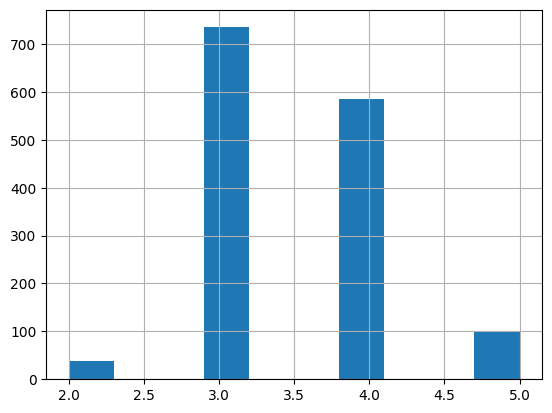

In [ ]:
df_train["KitchenQualNum_mapped"].hist()

(array([  0.,  39., 735., 586., 100.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

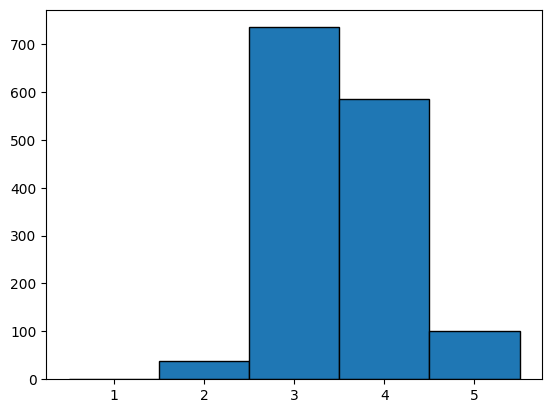

#### Scatter plot of `KitchenQualNum` (x) and `LogPrice` (y)

<Axes: xlabel='KitchenQualNum_mapped', ylabel='LogPrice'>

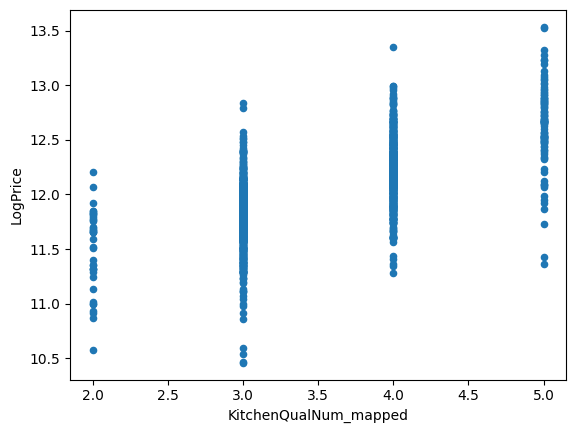

In [ ]:
df_train.plot.scatter(x="KitchenQualNum_mapped", y="LogPrice")

Text(0, 0.5, 'LogPrice')

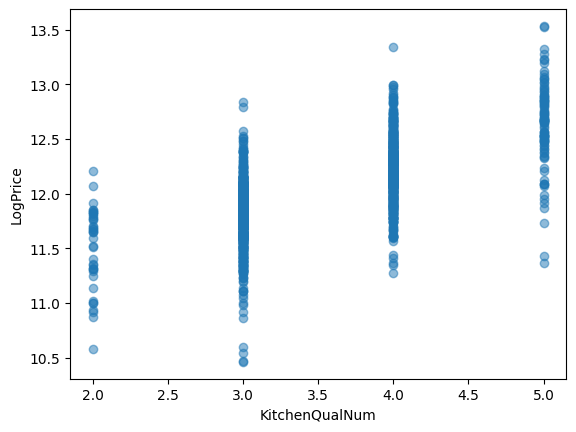

# Part III: Model building

In [ ]:
# These are the features that we've chosen for training because they had the biggest pos/neg correction with the target
fit_col = ['OverallQual', 'GrLivArea', 'Age', 'KitchenQualNum_mapped']

#### Define your X_train, y_train, and X_test

In [ ]:
# Separate out into your X(features) and Y(answer) in the training set
X_train = df_train[fit_col]         # Hints for the question
y_train = df_train['LogPrice']      # Answer


# Separate out into your X(features) and Y(answer) in the training set - but remember, in this example we do not have answers for the testing set
# because of the Kaggle competition
X_test = df_test[fit_col]

#### Instantiate and train a Linear Regression model

In [ ]:
model = LinearRegression()
# Train the model we just instantiated above using
model.fit(X_train, y_train) # X-train, Y-train (answers for the training)

LinearRegression()

LinearRegression()

#### Predict the Price for the __training__ data and use it to compute fit quality using the RMSE metric

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[11.64852918 11.95543961 11.96611433 ... 11.75158831 11.77403039
 12.28575079]


In [ ]:
predictions_train = model.predict(X_train)
error = metrics.root_mean_squared_error(y_train, predictions_train)
print(f"RMSE on training data: {error}")

RMSE on training data: 0.1816783321693179


#### Predict the target (LogPrice) for the test data

In [ ]:
predictions_test = model.predict(X_test)
print(predictions_test)

[11.64852918 11.95543961 11.96611433 ... 11.75158831 11.77403039
 12.28575079]


Returning the `LogPrice` to the original `Price` scale by using `np.exp()`
```python
Price = np.exp(LogPrice)
```

In [ ]:
price_predictions = np.exp(predictions_test)
print(price_predictions)

[114522.79655315 155661.58681302 157332.12969683 ... 126955.04275484
 129836.38873415 216587.69159902]


#### Can we use X_test to compute accuracy? Why? What do we do with the predicted `LogPrice`?

In [ ]:
# do this for the train set
# because we dont have the value for y_test in this example - we cannot calculate the accuracy for the testing set

# accuracy_score = metrics.accuracy_score(y_train, predictions)
# print(accuracy_score)